In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [377]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [378]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [380]:
df.country_long

0      India
1      India
2      India
3      India
4      India
       ...  
902    India
903    India
904    India
905    India
906    India
Name: country_long, Length: 907, dtype: object

India    907
Name: country_long, dtype: int64


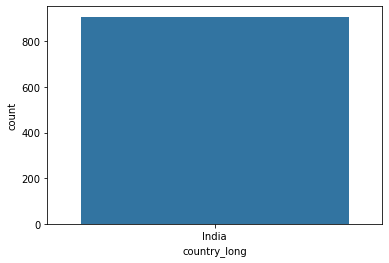

In [381]:
import seaborn as sns #checking for null
country_long=sns.countplot(x="country_long", data=df)
print(df["country_long"].value_counts())

In [382]:
#We can remove the column country & country_long as all 907 values are India . We shall also be removing gppd_idnr as it does
#not impact fuel type or capacity
#We also remove other_fuel2 & other_fuel3 as all values are null
#Source, url, and geo location sprce can also be elminated as they are not required features for predicting fuel type or cpacoty

In [383]:
# dropping these  columns as they are not relevant to predict primary fuel or capacity
df = df.drop(['country','country_long', 'gppd_idnr', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url', 'wepp_id', 'geolocation_source'], axis=1)

In [384]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
df.columns


Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


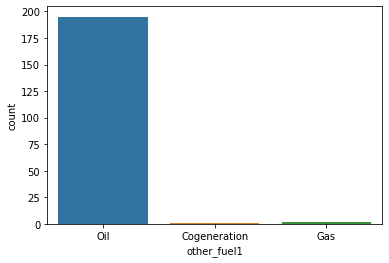

In [386]:
import seaborn as sns #checking for null
other_fuel1=sns.countplot(x="other_fuel1", data=df)
print(df["other_fuel1"].value_counts())

In [387]:
df1=df.fillna({"other_fuel1":df["other_fuel1"].mode()[0]})

In [388]:
df1

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
df1.isnull().sum()

name                          0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                   0
commissioning_year          380
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [390]:
df1.generation_gwh_2013 #checking for null

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: generation_gwh_2013, Length: 907, dtype: float64

In [391]:
df1.generation_gwh_2019 #checking for null

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: generation_gwh_2019, Length: 907, dtype: float64

2019.0    519
Name: year_of_capacity_data, dtype: int64


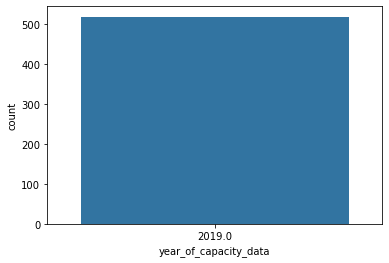

In [392]:
import seaborn as sns #checking for null
commissioning_year=sns.countplot(x="year_of_capacity_data", data=df1)
print(df1["year_of_capacity_data"].value_counts())

In [393]:
df1.estimated_generation_gwh

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: estimated_generation_gwh, Length: 907, dtype: float64

In [394]:
#droppin estimated_generation_gwh, generation_gwh_2019, generation_gwh_2013 as null
df1 = df1.drop(['estimated_generation_gwh','generation_gwh_2019', 'generation_gwh_2013'], axis=1)

In [395]:
df1.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


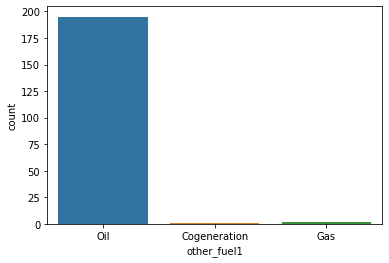

In [396]:
import seaborn as sns #checking for null
Otherfuel1=sns.countplot(x="other_fuel1", data=df)
print(df["other_fuel1"].value_counts())

In [397]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


2019.0    519
Name: year_of_capacity_data, dtype: int64


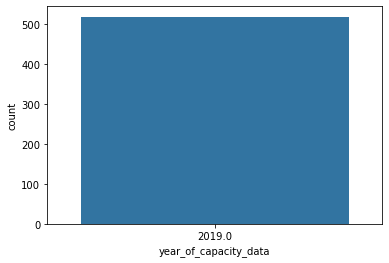

In [398]:
import seaborn as sns #checking for null
year_of_capacity_data=sns.countplot(x="year_of_capacity_data", data=df)
print(df1["year_of_capacity_data"].value_counts())

In [399]:
df['year_of_capacity_data'].unique

<bound method Series.unique of 0         NaN
1         NaN
2         NaN
3      2019.0
4      2019.0
        ...  
902    2019.0
903       NaN
904       NaN
905       NaN
906       NaN
Name: year_of_capacity_data, Length: 907, dtype: float64>

In [400]:
df1

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [401]:
df1

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [402]:
# dropping these  columns as they are null - generation_gwh_2019  and generation_gwh_2013
df1 = df.drop(['generation_gwh_2013'], axis=1)

In [403]:
df1

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
df1.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

In [405]:
#adding zero to numerical columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      907 non-null    object 
 1   capacity_mw               907 non-null    float64
 2   latitude                  861 non-null    float64
 3   longitude                 861 non-null    float64
 4   primary_fuel              907 non-null    object 
 5   other_fuel1               198 non-null    object 
 6   commissioning_year        527 non-null    float64
 7   year_of_capacity_data     519 non-null    float64
 8   generation_gwh_2014       398 non-null    float64
 9   generation_gwh_2015       422 non-null    float64
 10  generation_gwh_2016       434 non-null    float64
 11  generation_gwh_2017       440 non-null    float64
 12  generation_gwh_2018       448 non-null    float64
 13  generation_gwh_2019       0 non-null      float64
 14  generation

In [406]:
#dropping data source 
# dropping these  columns as they are null - generation_gwh_2019  and generation_gwh_2013
df1 = df1.drop(['generation_data_source'], axis=1)

In [407]:
df1.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'estimated_generation_gwh'],
      dtype='object')

In [408]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      907 non-null    object 
 1   capacity_mw               907 non-null    float64
 2   latitude                  861 non-null    float64
 3   longitude                 861 non-null    float64
 4   primary_fuel              907 non-null    object 
 5   other_fuel1               198 non-null    object 
 6   commissioning_year        527 non-null    float64
 7   year_of_capacity_data     519 non-null    float64
 8   generation_gwh_2014       398 non-null    float64
 9   generation_gwh_2015       422 non-null    float64
 10  generation_gwh_2016       434 non-null    float64
 11  generation_gwh_2017       440 non-null    float64
 12  generation_gwh_2018       448 non-null    float64
 13  generation_gwh_2019       0 non-null      float64
 14  estimated_

In [409]:
df2=df1.fillna(0)

In [410]:
df2

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,0,2011.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,0,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0,0.0
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,0.0,0.0
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [411]:
df2.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.0
mean,326.223755,20.122831,73.536147,1160.382580,1155.304300,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911,0.0,0.0
std,590.085456,7.655960,17.674358,985.973139,999.466215,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,16.725000,16.172050,73.811550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,59.200000,21.281800,76.493800,1978.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,385.250000,25.176450,79.206100,2003.000000,2019.000000,556.562750,598.926350,670.039394,709.290725,687.754000,0.0,0.0
max,4760.000000,34.649000,95.408000,2018.000000,2019.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0,0.0


In [412]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      907 non-null    object 
 1   capacity_mw               907 non-null    float64
 2   latitude                  907 non-null    float64
 3   longitude                 907 non-null    float64
 4   primary_fuel              907 non-null    object 
 5   other_fuel1               907 non-null    object 
 6   commissioning_year        907 non-null    float64
 7   year_of_capacity_data     907 non-null    float64
 8   generation_gwh_2014       907 non-null    float64
 9   generation_gwh_2015       907 non-null    float64
 10  generation_gwh_2016       907 non-null    float64
 11  generation_gwh_2017       907 non-null    float64
 12  generation_gwh_2018       907 non-null    float64
 13  generation_gwh_2019       907 non-null    float64
 14  estimated_

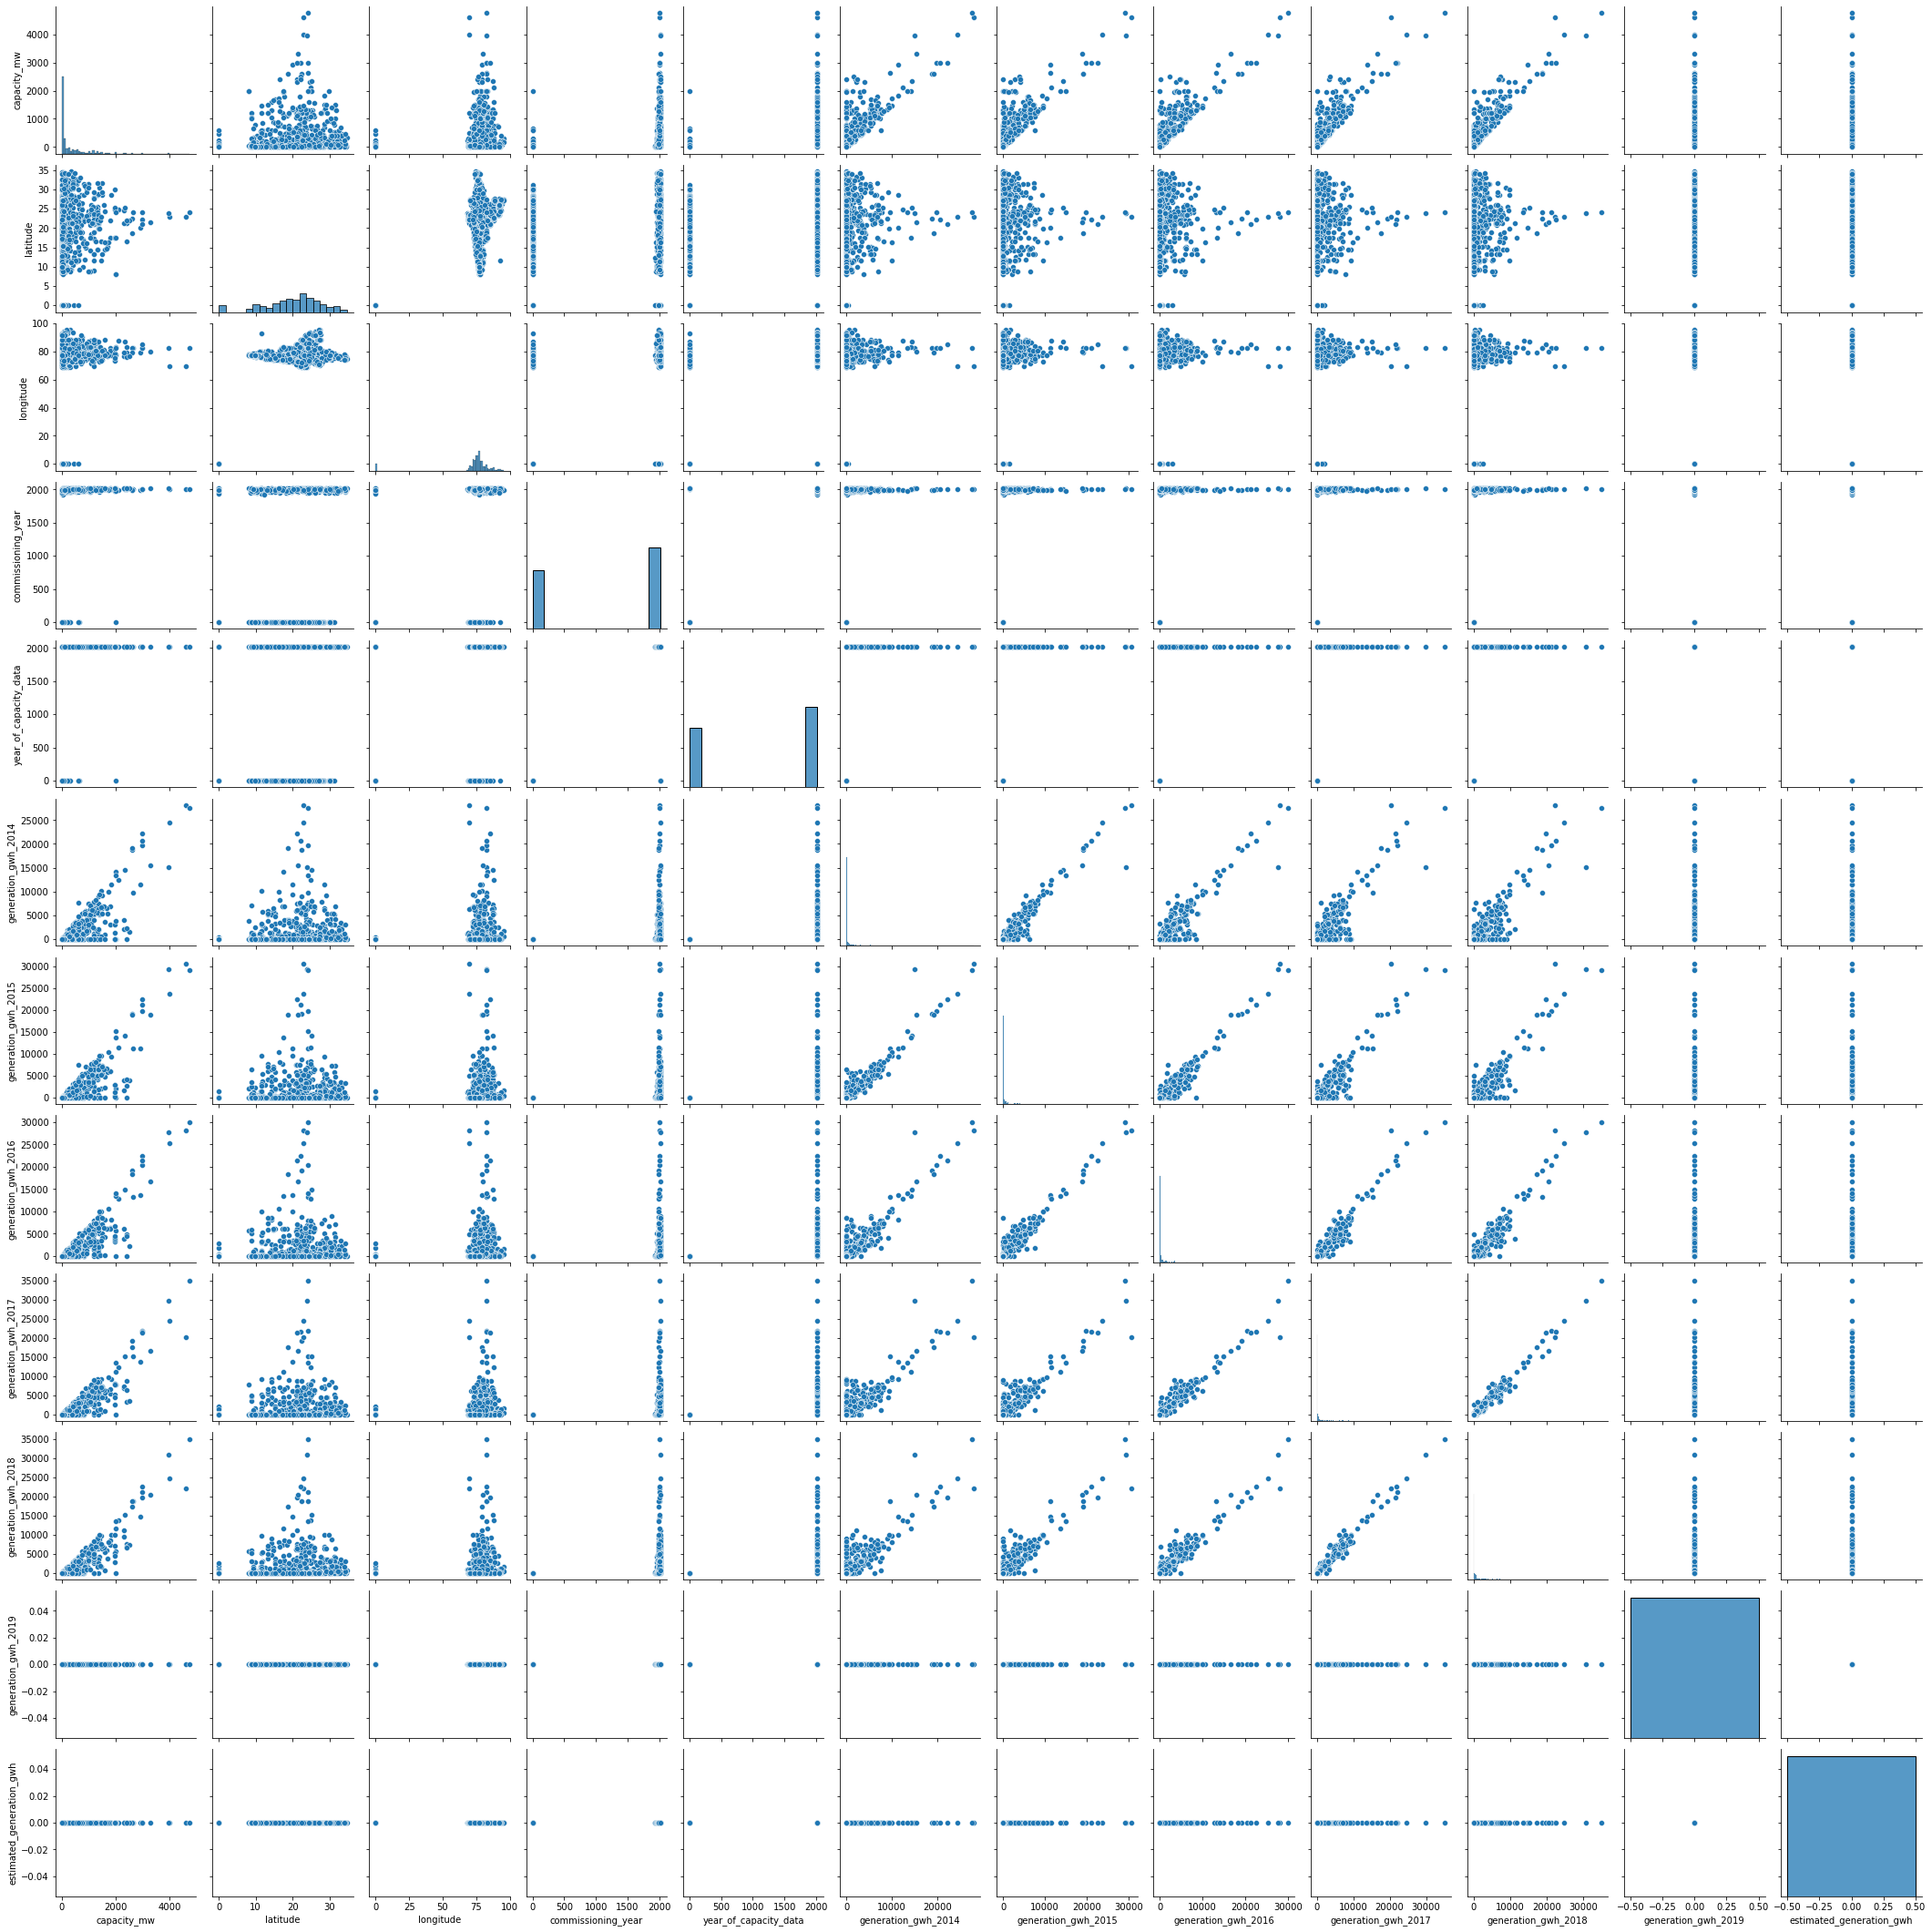

In [413]:
import matplotlib.pyplot as plt
sns.pairplot(df2)
plt.savefig('pairplot2.png')
plt.show()

In [416]:
df2.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'estimated_generation_gwh'],
      dtype='object')

In [417]:
#separating categorical data
df_visualization_Categorical_Data=df2[["name", "primary_fuel", "other_fuel1"]].copy()

In [420]:
df_visualization_Categorical_Data.tail()

,name,primary_fuel,other_fuel1
902,YERMARUS TPP,Coal,Oil
903,Yelesandra Solar Power Plant,Solar,0
904,Yelisirur wind power project,Wind,0
905,ZAWAR MINES,Coal,0
906,iEnergy Theni Wind Farm,Wind,0


In [423]:
#separating continous data data
df_visualization_Continous_Data=df2[["capacity_mw", "latitude", "longitude", "commissioning_year", "year_of_capacity_data", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018"]].copy()

In [424]:
df_visualization_Continous_Data

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


ValueError: num must be 1 <= num <= 9, not 10

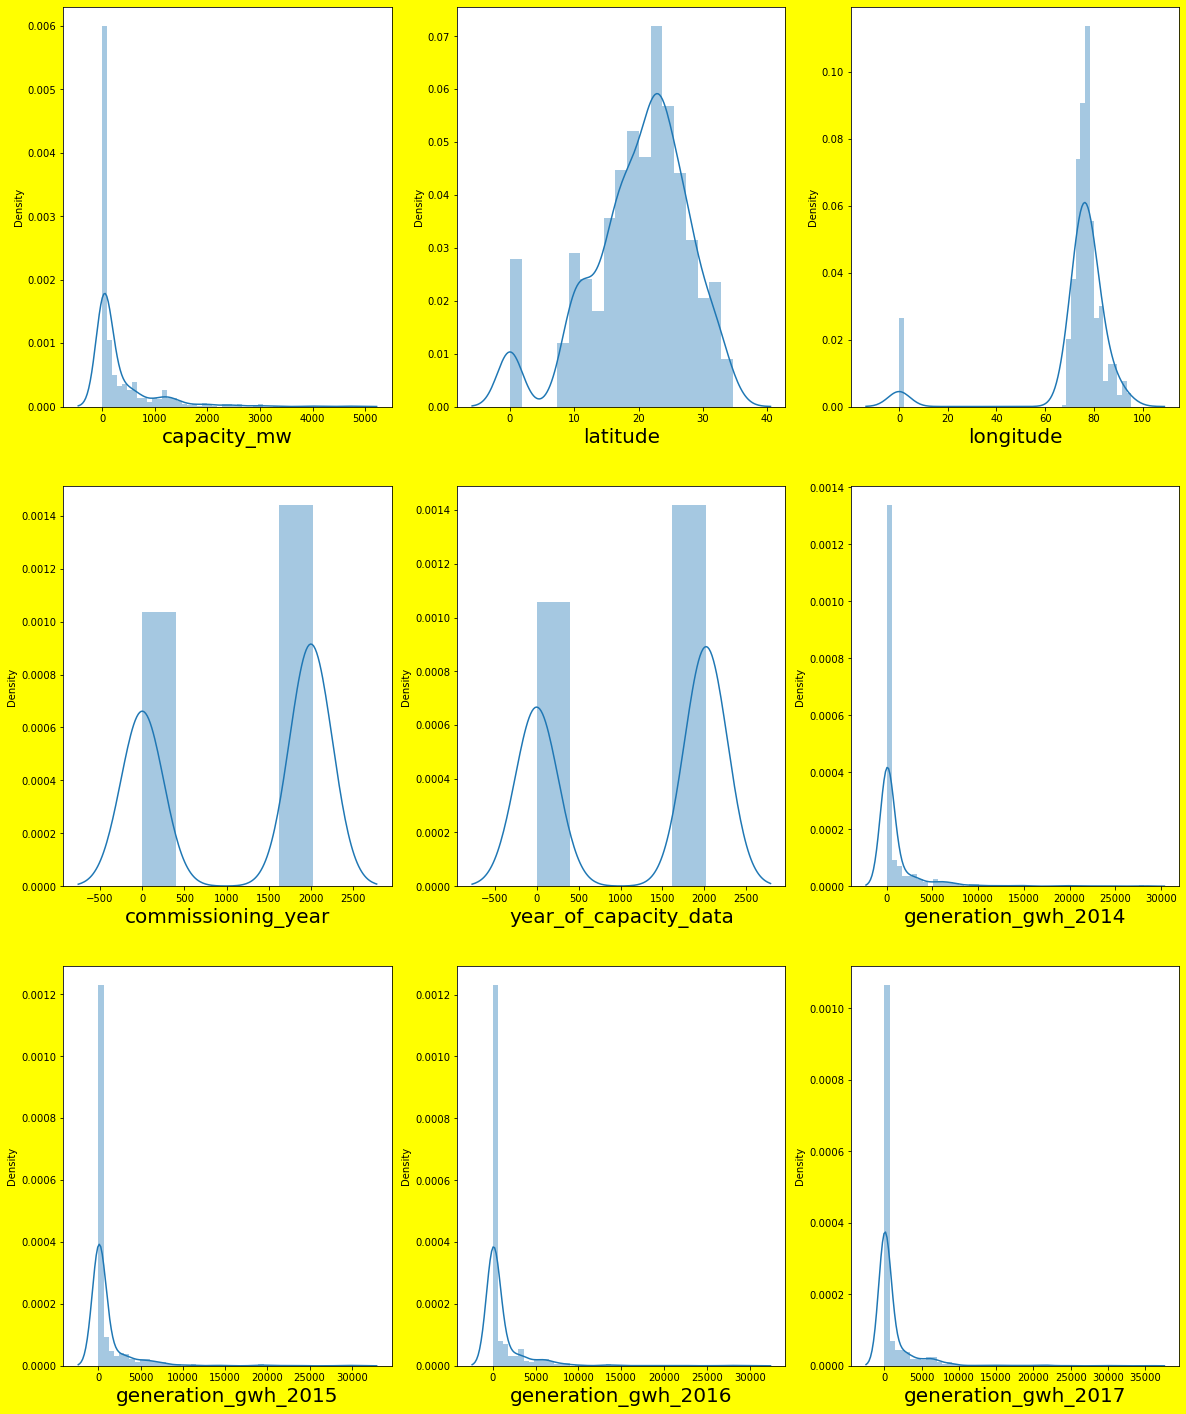

In [425]:
#EDA for continous data
#Let's see how data is distributed for every column
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber=1
for column in df_visualization_Continous_Data:
    if plotnumber <= 10: #column is 10 in number
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df_visualization_Continous_Data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+= 1
plt.show()


In [435]:
#Encoding of DataFrame:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [437]:
#lets focus on categorical data
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df2.columns.values.tolist()
for col in features:
    if df2[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [438]:
categorical_columns

['other_fuel1']

In [440]:
df_dummies = pd.get_dummies(df2[categorical_columns], drop_first=True)

In [441]:
df_dummies.head()

,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1


In [442]:
df2=df2.join(df_dummies)

In [444]:
df2.drop(columns=categorical_columns,axis=1, inplace=True)

In [467]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      907 non-null    float64
 1   capacity_mw               907 non-null    float64
 2   latitude                  907 non-null    float64
 3   longitude                 907 non-null    float64
 4   primary_fuel              907 non-null    float64
 5   commissioning_year        907 non-null    float64
 6   year_of_capacity_data     907 non-null    float64
 7   generation_gwh_2014       907 non-null    float64
 8   generation_gwh_2015       907 non-null    float64
 9   generation_gwh_2016       907 non-null    float64
 10  generation_gwh_2017       907 non-null    float64
 11  generation_gwh_2018       907 non-null    float64
 12  generation_gwh_2019       907 non-null    float64
 13  estimated_generation_gwh  907 non-null    float64
 14  other_fuel

In [468]:
df2.replace(np.nan, 0)

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil
0,0.0,2.5,28.1839,73.2407,6.0,2011.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0
1,1.0,98.0,24.7663,74.6090,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0
2,2.0,39.2,21.9038,69.3732,7.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0
3,3.0,135.0,23.8712,91.3602,2.0,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0,0.0,0,0,0
4,4.0,1800.0,21.9603,82.4091,1.0,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,1600.0,16.2949,77.3568,1.0,2016.0,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,0.0,0.0,0,0,1
903,903.0,3.0,12.8932,78.1654,6.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0
904,904.0,25.5,15.2758,75.5811,7.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0
905,905.0,80.0,24.3500,73.7477,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0


<AxesSubplot:>

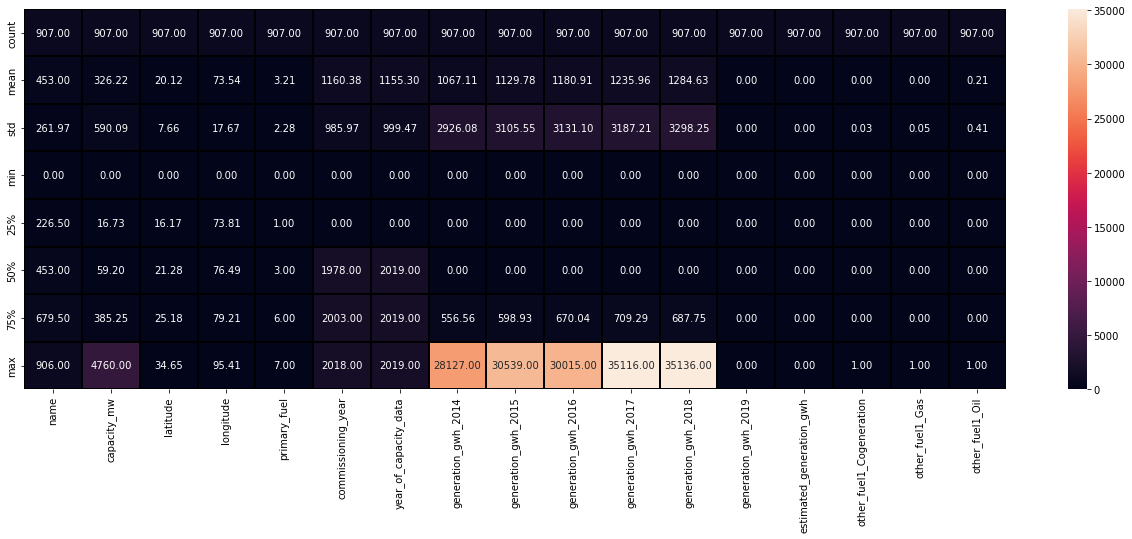

In [469]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df2.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [470]:
df2.corr()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil
name,1.000000,0.060240,-0.126080,-0.024061,0.040753,0.009077,0.025108,0.079555,0.068767,0.062515,0.064612,0.062570,NaN,NaN,0.045426,0.064995,0.010896
capacity_mw,0.060240,1.000000,0.103618,0.153272,-0.380395,0.414667,0.417896,0.815794,0.842964,0.876811,0.894259,0.906774,NaN,NaN,-0.003731,-0.000098,0.634213
latitude,-0.126080,0.103618,1.000000,0.592760,-0.085174,0.045036,0.058729,0.100765,0.096393,0.089594,0.102933,0.099208,NaN,NaN,-0.021444,-0.006896,0.072962
longitude,-0.024061,0.153272,0.592760,1.000000,-0.216738,0.072341,0.109744,0.118932,0.121014,0.124467,0.130957,0.131175,NaN,NaN,0.005879,-0.001697,0.139095
primary_fuel,0.040753,-0.380395,-0.085174,-0.216738,1.000000,-0.481665,-0.500558,-0.285822,-0.291273,-0.304119,-0.313935,-0.315301,NaN,NaN,-0.032156,0.036996,-0.498279
commissioning_year,0.009077,0.414667,0.045036,0.072341,-0.481665,1.000000,0.981717,0.311099,0.310897,0.322731,0.331997,0.333507,NaN,NaN,0.028273,0.038981,0.448995
year_of_capacity_data,0.025108,0.417896,0.058729,0.109744,-0.500558,0.981717,1.000000,0.315496,0.314722,0.326281,0.335479,0.336951,NaN,NaN,0.028726,0.040646,0.452491
generation_gwh_2014,0.079555,0.815794,0.100765,0.118932,-0.285822,0.311099,0.315496,1.000000,0.966869,0.938079,0.907753,0.898900,NaN,NaN,0.011442,-0.010963,0.512134
generation_gwh_2015,0.068767,0.842964,0.096393,0.121014,-0.291273,0.310897,0.314722,0.966869,1.000000,0.974772,0.944057,0.936856,NaN,NaN,0.009627,-0.016998,0.524679
generation_gwh_2016,0.062515,0.876811,0.089594,0.124467,-0.304119,0.322731,0.326281,0.938079,0.974772,1.000000,0.976470,0.967814,NaN,NaN,0.004353,-0.017740,0.548818


In [471]:
df2.isnull().sum().sum()

0

<AxesSubplot:>

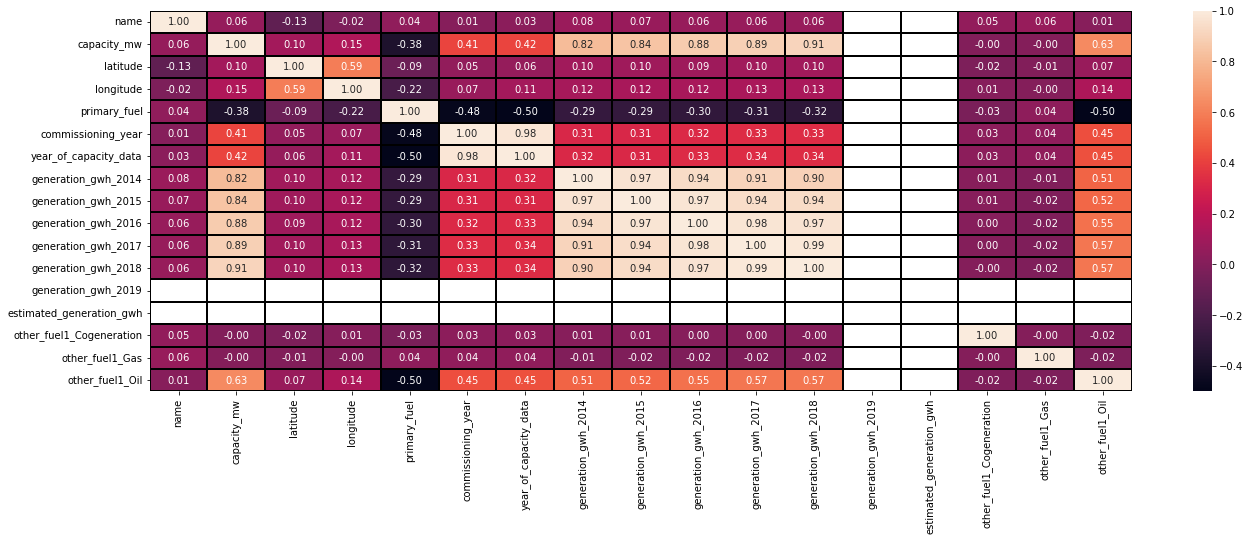

In [472]:
plt.figure(figsize=(22,7))
sns.heatmap(df2.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

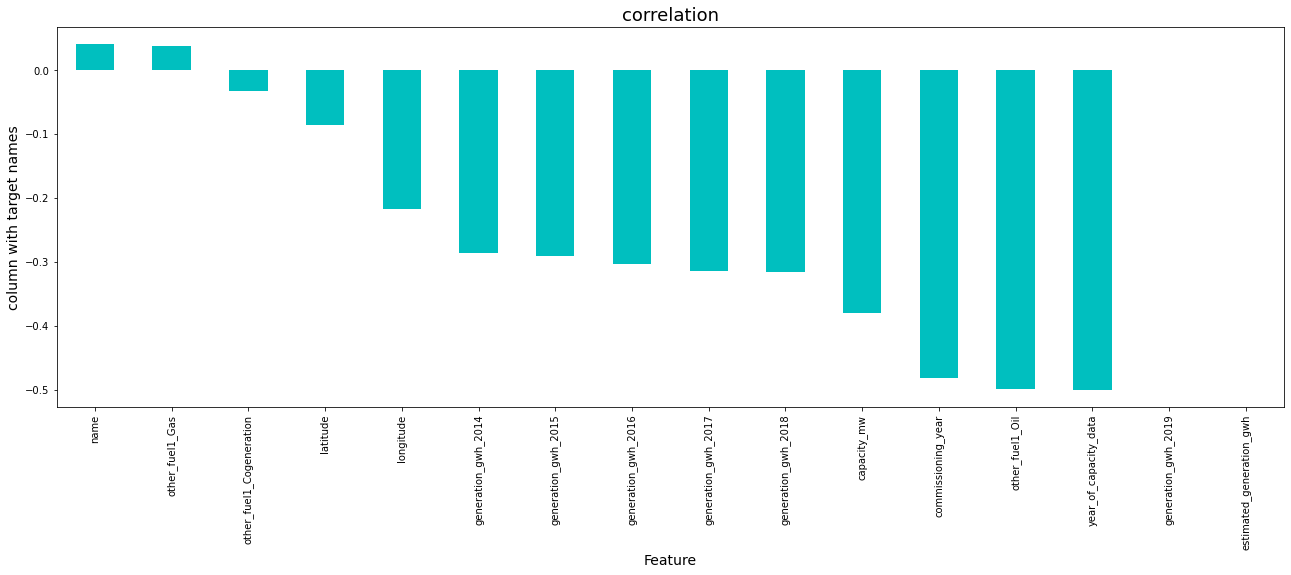

In [473]:
plt.figure(figsize=(22,7))
df2.corr()['primary_fuel'].sort_values(ascending=False).drop(["primary_fuel"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [474]:
df2.skew().sort_values(ascending=False)

other_fuel1_Cogeneration    30.116441
other_fuel1_Gas             21.260214
generation_gwh_2015          5.260778
generation_gwh_2014          4.986588
generation_gwh_2016          4.984874
generation_gwh_2017          4.979870
generation_gwh_2018          4.846091
capacity_mw                  3.123576
other_fuel1_Oil              1.389800
primary_fuel                 0.472251
generation_gwh_2019          0.000000
estimated_generation_gwh     0.000000
name                         0.000000
year_of_capacity_data       -0.292409
commissioning_year          -0.328505
latitude                    -0.730074
longitude                   -3.581827
dtype: float64

In [475]:
corr_matrix=df2.corr()
corr_matrix["primary_fuel"].sort_values(ascending=False)

primary_fuel                1.000000
name                        0.040753
other_fuel1_Gas             0.036996
other_fuel1_Cogeneration   -0.032156
latitude                   -0.085174
longitude                  -0.216738
generation_gwh_2014        -0.285822
generation_gwh_2015        -0.291273
generation_gwh_2016        -0.304119
generation_gwh_2017        -0.313935
generation_gwh_2018        -0.315301
capacity_mw                -0.380395
commissioning_year         -0.481665
other_fuel1_Oil            -0.498279
year_of_capacity_data      -0.500558
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
Name: primary_fuel, dtype: float64

<AxesSubplot:xlabel='generation_gwh_2014'>

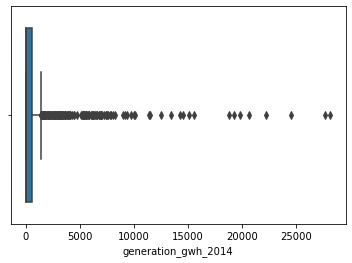

In [478]:
sns.boxplot(df2["generation_gwh_2014"])

<AxesSubplot:xlabel='longitude'>

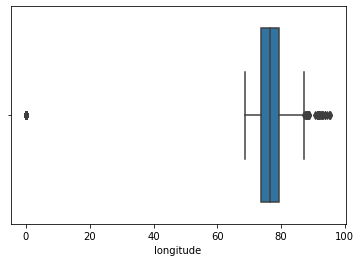

In [479]:
sns.boxplot(df2["longitude"])

ValueError: num must be 1 <= num <= 8, not 9

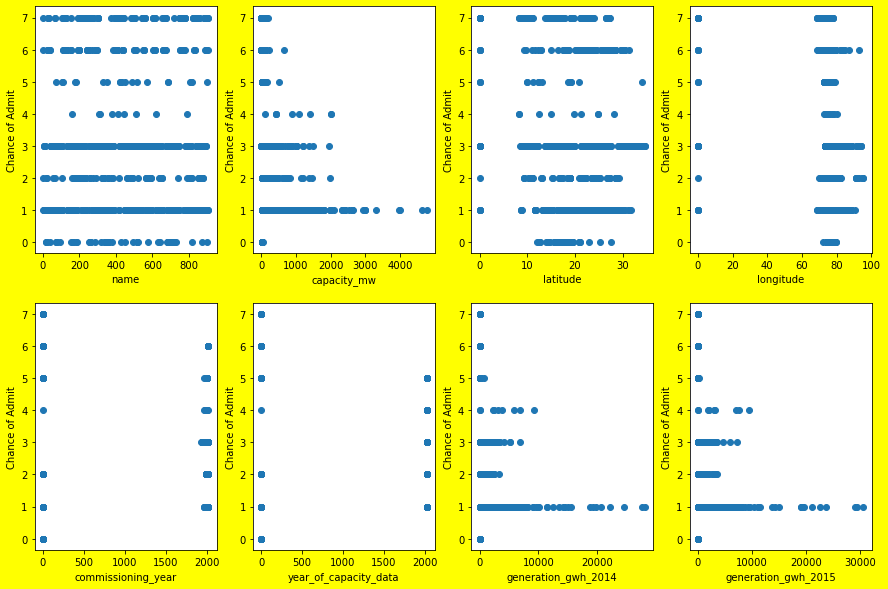

In [481]:
# Visualizing relationship
plt.figure(figsize = (15,10 ), facecolor = 'yellow') 
plotnumber = 1 
for column in x :
    if plotnumber <= 10:
        ax = plt.subplot (2,4 , plotnumber) 
        plt.scatter(x[column] , y) #scatter plot
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('Chance of Admit' , fontsize = 10)
    plotnumber += 1 
plt.tight_layout()

In [460]:
from sklearn.preprocessing import power_transform
X_new=power_transform(x)

In [490]:
X_new

array([[-2.16561515, -1.69576688,  1.11516688, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [-2.14663031,  0.19369368,  0.60022859, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [-2.13033981, -0.2923371 ,  0.18431095, ..., -0.03322277,
        -0.04701005, -0.52333202],
       ...,
       [ 1.54842588, -0.52277344, -0.71738276, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [ 1.55136078,  0.08691496,  0.53883892, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [ 1.55429474, -0.75589054, -1.36868349, ..., -0.03322277,
        -0.04701005, -0.52333202]])

In [491]:
pd.DataFrame(X_new, columns=x.columns).skew().sort_values(ascending=False)

other_fuel1_Cogeneration    30.116441
other_fuel1_Gas             21.260214
other_fuel1_Oil              1.389800
generation_gwh_2014          0.460708
generation_gwh_2015          0.385627
generation_gwh_2016          0.345864
generation_gwh_2017          0.334327
generation_gwh_2018          0.317200
capacity_mw                  0.022164
generation_gwh_2019          0.000000
estimated_generation_gwh     0.000000
name                        -0.288179
year_of_capacity_data       -0.292409
latitude                    -0.323518
commissioning_year          -0.329010
longitude                   -1.532802
dtype: float64

In [463]:
x=pd.DataFrame(X_new, columns=x.columns)

In [464]:
pd.DataFrame(X_new, columns=x.columns).skew().sort_values(ascending=False)

other_fuel1_Cogeneration    30.116441
other_fuel1_Gas             21.260214
other_fuel1_Oil              1.389800
generation_gwh_2014          0.460708
generation_gwh_2015          0.385627
generation_gwh_2016          0.345864
generation_gwh_2017          0.334327
generation_gwh_2018          0.317200
capacity_mw                  0.022164
generation_gwh_2019          0.000000
estimated_generation_gwh     0.000000
name                        -0.288179
year_of_capacity_data       -0.292409
latitude                    -0.323518
commissioning_year          -0.329010
longitude                   -1.532802
dtype: float64

In [492]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)
Scaled_X

array([[-2.16561515, -1.69576688,  1.11516688, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [-2.14663031,  0.19369368,  0.60022859, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [-2.13033981, -0.2923371 ,  0.18431095, ..., -0.03322277,
        -0.04701005, -0.52333202],
       ...,
       [ 1.54842588, -0.52277344, -0.71738276, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [ 1.55136078,  0.08691496,  0.53883892, ..., -0.03322277,
        -0.04701005, -0.52333202],
       [ 1.55429474, -0.75589054, -1.36868349, ..., -0.03322277,
        -0.04701005, -0.52333202]])

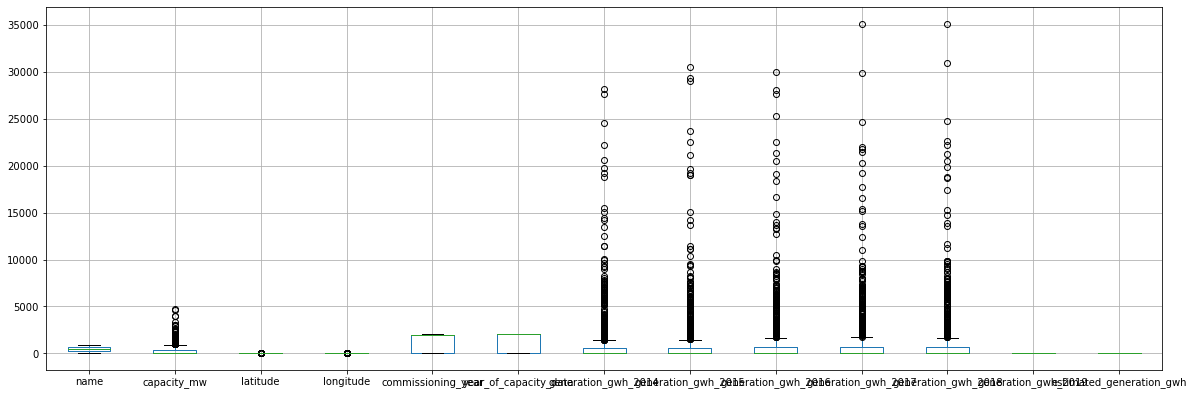

In [493]:
#Plotting boxplots for first 30 columns
x.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [347]:
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
from sklearn.metrics import classification_report

In [348]:
#Splitting the dataframe for logistic regression:
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(Scaled_X,y,random_state=i,test_size=0.25)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 19 The model performs very well
At random_state state:- 19
Training accuracy_score is:- 67.4
Testing accuracy_score is:- 67.4 


At random_state state 230 The model performs very well
At random_state state:- 230
Training accuracy_score is:- 67.4
Testing accuracy_score is:- 67.4 


At random_state state 323 The model performs very well
At random_state state:- 323
Training accuracy_score is:- 67.8
Testing accuracy_score is:- 67.8 


At random_state state 341 The model performs very well
At random_state state:- 341
Training accuracy_score is:- 67.4
Testing accuracy_score is:- 67.4 




In [351]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.70      0.86      0.77        57
         2.0       0.60      0.15      0.24        20
         3.0       0.83      0.90      0.87        72
         4.0       0.00      0.00      0.00         2
         5.0       0.50      0.25      0.33         4
         6.0       0.64      0.67      0.65        24
         7.0       0.55      0.71      0.62        34

    accuracy                           0.70       227
   macro avg       0.48      0.44      0.44       227
weighted avg       0.65      0.70      0.66       227



In [352]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25, random_state=323)

In [332]:
!pip install classifier


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for classifier: filename=classifier-2.0-py3-none-any.whl size=5049 sha256=795498bfe4461f2729285729bd818b9cc74f4eaa59f0b17726ad18930b393674
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\fe\4d\fd\139652fe74fadb65ceebaba55d9629b8816639233fa00cd060
Successfully built classifier

[notice] A new release of pip available: 22.1.2 -> 22.2.2


[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

In [353]:
def print_score(clf, x_train, x_test,y_train, y_test, train=True): #clf is classifier algorithm
    if train: 
        y_pred2=clf.predict(x_train)
        print("\n================Train Result========")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred2)*100:.2f}%")
    elif train==False: #if tain false, it means it is test
              pred=clf.predict(x_test)
              print("\n‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒")
              print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
              print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [336]:
from sklearn.svm import SVC
svc=SVC()
#svc Model training and printing train and test score
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)


================Train Result========
Accuracy Score: 33.53%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 34.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.21      0.39      0.27        66
         2.0       0.00      0.00      0.00        15
         3.0       0.52      0.74      0.61        72
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00        24
         7.0       0.00      0.00      0.00        35

    accuracy                           0.35       227
   macro avg       0.09      0.14      0.11       227
weighted avg       0.23      0.35      0.27       227



In [359]:
from sklearn.ensemble import GradientBoostingClassifier 
gbdt=GradientBoostingClassifier()

#gradient boosting Model training and printing train and test score
gbdt.fit(x_train,y_train)


#Call the function and pass dataset to check train and test score
print_score(gbdt, x_train,x_test,y_train,y_test, train=True) 
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 100.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 78.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.70      0.64      0.67        11
         1.0       0.80      0.85      0.82        66
         2.0       0.45      0.33      0.38        15
         3.0       0.88      0.92      0.90        72
         4.0       0.00      0.00      0.00         2
         5.0       0.40      1.00      0.57         2
         6.0       0.73      0.67      0.70        24
         7.0       0.76      0.74      0.75        35

    accuracy                           0.78       227
   macro avg       0.59      0.64      0.60       227
weighted avg       0.77      0.78      0.78       227



In [361]:
y_pred4=gbdt.predict(x_test)

In [362]:
r2_score(y_test,y_pred4)

0.44628668412079875

In [355]:
#xgb
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [356]:
xgb.fit(x_train, y_train) 
y_pred3=xgb.predict(x_test)

In [357]:
r2_score(y_test,y_pred3)

0.658625471016778

In [363]:
from sklearn.ensemble import RandomForestClassifier #same code as above only randon forest used
rf = RandomForestClassifier()

# Random Forest Model training and printing train and test score
rf.fit(x_train,y_train)


# Call the function and pass dataset to check train and test score
print_score(rf, x_train,x_test,y_train,y_test, train=True)
print_score(rf, x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 100.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 81.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.87      0.82      0.84        66
         2.0       0.55      0.40      0.46        15
         3.0       0.95      0.96      0.95        72
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.70      0.88      0.78        24
         7.0       0.79      0.77      0.78        35

    accuracy                           0.81       227
   macro avg       0.58      0.57      0.57       227
weighted avg       0.82      0.81      0.82       227



In [364]:
rf.fit(x_train, y_train) 
y_pred5=rf.predict(x_test)

In [365]:
r2_score(y_test,y_pred5)


0.6216436312713103

In [372]:
pred=rf.predict(x_test)

In [ ]:
#THUS RANDOM CLASIFIR GIVES THE BEST RESULT

In [ ]:
#LET US PREDICT the capacity

In [375]:
# dividing feature and Label data
X = df2.drop(columns=['capacity_mw'], axis = 1)
y= df2['capacity_mw']

KeyError: "['capacity_mw'] not found in axis"

In [494]:
#using linear regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [495]:
from sklearn.model_selection import train_test_split
LR=LinearRegression()

In [497]:
from sklearn.metrics import r2_score
for i in range(0,200):
    x_train, x_test, y_train, y_test=train_test_split(Scaled_X,y,test_size=0.25,random_state=99)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.40526790969042115
At random state 0,the testing accuracy is:- 0.39980230788340276


At random state 1,the training accuracy is:- 0.40526790969042115
At random state 1,the testing accuracy is:- 0.39980230788340276


At random state 2,the training accuracy is:- 0.40526790969042115
At random state 2,the testing accuracy is:- 0.39980230788340276


At random state 3,the training accuracy is:- 0.40526790969042115
At random state 3,the testing accuracy is:- 0.39980230788340276


At random state 4,the training accuracy is:- 0.40526790969042115
At random state 4,the testing accuracy is:- 0.39980230788340276


At random state 5,the training accuracy is:- 0.40526790969042115
At random state 5,the testing accuracy is:- 0.39980230788340276


At random state 6,the training accuracy is:- 0.40526790969042115
At random state 6,the testing accuracy is:- 0.39980230788340276


At random state 7,the training accuracy is:- 0.40526790969042115
At random state 7,

At random state 82,the testing accuracy is:- 0.39980230788340276


At random state 83,the training accuracy is:- 0.40526790969042115
At random state 83,the testing accuracy is:- 0.39980230788340276


At random state 84,the training accuracy is:- 0.40526790969042115
At random state 84,the testing accuracy is:- 0.39980230788340276


At random state 85,the training accuracy is:- 0.40526790969042115
At random state 85,the testing accuracy is:- 0.39980230788340276


At random state 86,the training accuracy is:- 0.40526790969042115
At random state 86,the testing accuracy is:- 0.39980230788340276


At random state 87,the training accuracy is:- 0.40526790969042115
At random state 87,the testing accuracy is:- 0.39980230788340276


At random state 88,the training accuracy is:- 0.40526790969042115
At random state 88,the testing accuracy is:- 0.39980230788340276


At random state 89,the training accuracy is:- 0.40526790969042115
At random state 89,the testing accuracy is:- 0.39980230788340276


At

At random state 146,the training accuracy is:- 0.40526790969042115
At random state 146,the testing accuracy is:- 0.39980230788340276


At random state 147,the training accuracy is:- 0.40526790969042115
At random state 147,the testing accuracy is:- 0.39980230788340276


At random state 148,the training accuracy is:- 0.40526790969042115
At random state 148,the testing accuracy is:- 0.39980230788340276


At random state 149,the training accuracy is:- 0.40526790969042115
At random state 149,the testing accuracy is:- 0.39980230788340276


At random state 150,the training accuracy is:- 0.40526790969042115
At random state 150,the testing accuracy is:- 0.39980230788340276


At random state 151,the training accuracy is:- 0.40526790969042115
At random state 151,the testing accuracy is:- 0.39980230788340276


At random state 152,the training accuracy is:- 0.40526790969042115
At random state 152,the testing accuracy is:- 0.39980230788340276


At random state 153,the training accuracy is:- 0.405267

In [498]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

In [499]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.2325129600247053
MSE: 2.994663724088598
RMSE: 1.7305096717697357


In [508]:
LR.score(x_train , y_train)

0.40526790969042115

In [500]:
#With descision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predD=dt.predict(x_test)

In [501]:
print('MAE:', metrics.mean_absolute_error(y_test, predD))
print('MSE:', metrics.mean_squared_error(y_test, predD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predD)))

MAE: 0.5903083700440529
MSE: 2.511013215859031
RMSE: 1.584617687601344


In [509]:
dt.score(x_train , y_train)

1.0

In [502]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predR=rfr.predict(x_test)

In [503]:
print('MAE:', metrics.mean_absolute_error(y_test, predR))
print('MSE:', metrics.mean_squared_error(y_test, predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predR)))

MAE: 0.5437004405286344
MSE: 1.1410246696035242
RMSE: 1.06818756293243


In [510]:
rfr.score(x_train , y_train)

0.959112603986712

In [512]:
#xgb
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)
predX=xgb.predict(x_test)

In [513]:
print('MAE:', metrics.mean_absolute_error(y_test, predX))
print('MSE:', metrics.mean_squared_error(y_test, predX))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predX)))

MAE: 0.6526946348962804
MSE: 1.4259296819597127
RMSE: 1.194122976062228


In [514]:
xgb.score(x_train , y_train)

0.9995540903423389

In [519]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
predA=ada.predict(x_test)

In [520]:
print('MAE:', metrics.mean_absolute_error(y_test, predA))
print('MSE:', metrics.mean_squared_error(y_test, predA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predA)))

MAE: 0.8842580053275422
MSE: 2.1128662098264583
RMSE: 1.4535701599257114


In [521]:
ada.score(x_train , y_train)

0.5813081153176276

In [524]:
from sklearn.model_selection import RandomizedSearchCV

In [525]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [526]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions=params)

In [528]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [529]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3)

In [530]:
ada=AdaBoostRegressor(learning_rate=0.3,n_estimators=60)
ada.fit(x_train,y_train) #this is our score
predA= ada.predict(x_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,y_pred))

*****accuracy post tuning*****
-0.7870260554610005


,Y Test,Pred
63,1.0,1.265281
126,7.0,3.627435
219,3.0,3.054124
266,7.0,7.194202
547,3.0,2.744039


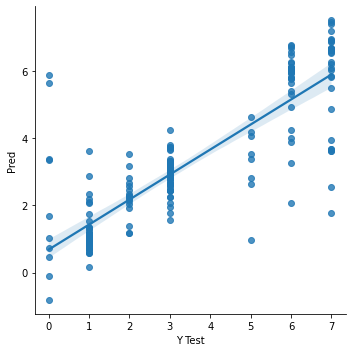

In [515]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':predX},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()